In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('seaborn-poster')
%matplotlib inline

## Load Iris data

In [2]:
# import the iris data
iris = datasets.load_iris()

# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


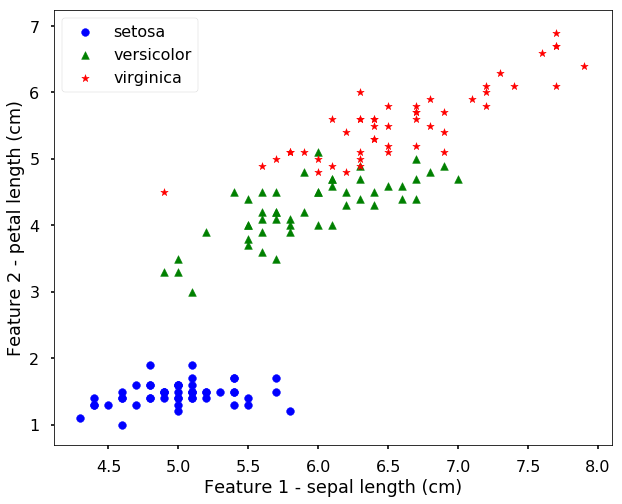

In [3]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

## Train a SVM

In [4]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## The training results  

In [5]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's view the performance on the training data, we will plot the confusion matrix. Also, we will plot the decision boundary, which will help us understand more of the capability of the classifier (since we only have two selected features, this makes us eaiser to view the decision boundary).

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    # highlight the support vectors
    #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    #            facecolors='none', zorder=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

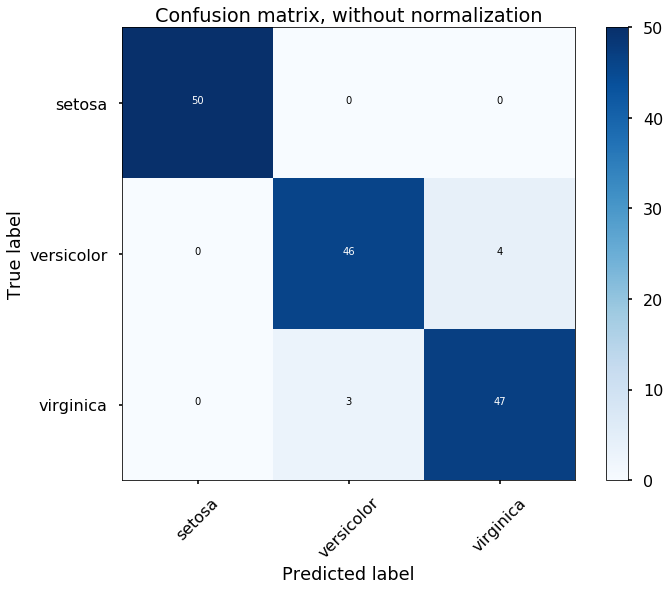

In [7]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

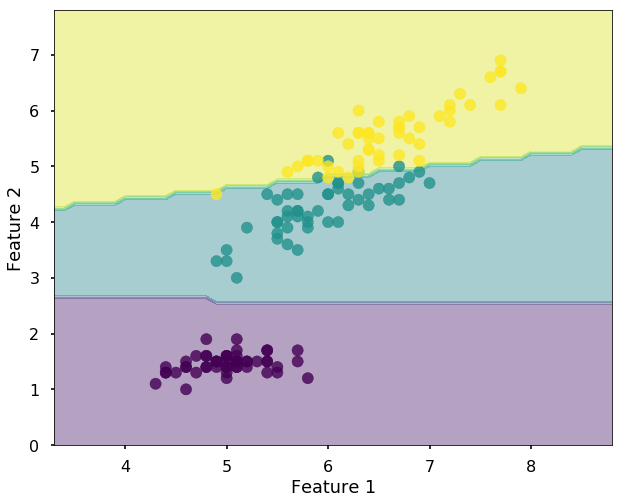

In [8]:
plot_desicion_boundary(X, y, clf)

## Exercise

Let's do the classification using an Artificial Neural Network. 

In [9]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Initialize ANN classifier

# create an ANN with two hidden layers, each with 10 neurons
hidden_layer_sizes = 

# using a logistic activation function
activation = 

mlp = MLPClassifier(hidden_layer_sizes= hidden_layer_sizes, activation=activation, \
                    max_iter = 2000, random_state=13)

In [ ]:
# Train the classifier with the traning data


In [ ]:
# predict results from the test data
predicted = 

In [ ]:
# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

## Solution

In [ ]:
%load solution_02.py